In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

# 1.0. Monthly C02 Concentrations

In [3]:
data = pd.read_csv( '../../data/Monthly_CO2_Concentrations.csv', converters = {'Year': np.int32, 'Month': np.int32} )
data = data[['CO2', 'Year', 'Month']]
data['Date'] = data['Year'].astype( str ) + '-' + data['Month'].astype( str )

In [1]:
data.head()

NameError: name 'data' is not defined

In [5]:
# remove all columns having missing values
data = data.loc[ (~pd.isnull( data['CO2'] ) ) & (~pd.isnull( data['Year'] ) ) & (~pd.isnull( data['Month'] ) ) ]
data = data.sort_values( ['Year', 'Month'] )

In [6]:
data.head()

,CO2,Year,Month,Date
5,327.29,1974,0,1974-0
6,328.23,1974,1,1974-1
7,329.55,1974,2,1974-2
0,333.13,1974,5,1974-5
1,332.09,1974,6,1974-6


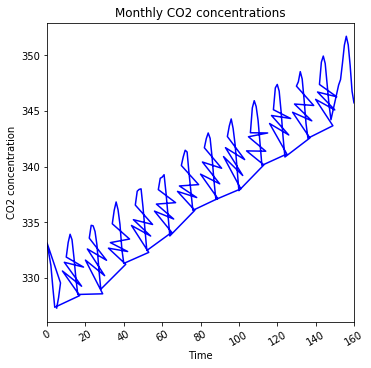

In [7]:
plt.figure( figsize=(5.5, 5.5) )
data['CO2'].plot( color='b' )
plt.title( 'Monthly CO2 concentrations' )
plt.xlabel( 'Time' )
plt.ylabel( 'CO2 concentration' )
plt.xticks( rotation=30 );

# 2.0. DJIA  

In [12]:
djia_df = pd.read_excel( '../../data/DJIA_Jan2016_Dec2016.xlsx' )
djia_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


Text(0, 0.5, 'Closing Value')

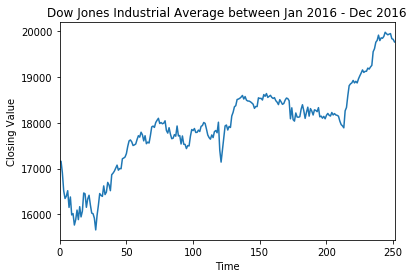

In [15]:
g = sns.tsplot( djia_df['Close'] )
g.set_title( 'Dow Jones Industrial Average between Jan 2016 - Dec 2016' )
g.set_xlabel( 'Time' )
g.set_ylabel( 'Closing Value' )

In [25]:
lag = np.arange( 0, 31 )
djia_acf = []
for l in lag:
    djia_acf.append( djia_df['Close'].autocorr(l) )

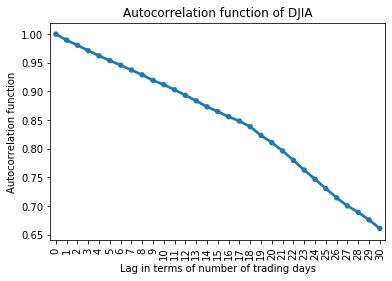

In [26]:
g = sns.pointplot( x=lag, y=djia_acf, markers='.' )
g.set_title( 'Autocorrelation function of DJIA' );
g.set_xlabel( 'Lag in terms of number of trading days' );
g.set_ylabel( 'Autocorrelation function' );
g.set_xticklabels( lag, rotation=90 );

# CHAPTER 02
---

In [21]:
import os
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
df = pd.read_csv( '../data/chemical-concentration-readings.csv' ) 

In [10]:
print( 'Shape of the dataset:', df.shape )
df.head( 10 )

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [11]:
datetime_rowid = df['Timestamp'].map( lambda t: pd.to_datetime( t, format='%Y-%m-%d %H:%M:%S' ) )
df.index = datetime_rowid
df.head( 10 )

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [12]:
daily = df['Chemical conc.'].resample( 'D' )
daily_mean = daily.mean()

In [13]:
fig = plt.figure( figsize=(5.5, 5.5) )
ax = fig.add_subplot( 1, 1, 1 )
df['Chemical conc.'].plot( ax=ax, color='b' )
daily_mean.plot( ax=ax, color='r' )

NameError: name 'plt' is not defined

In [15]:
!pip install matplotlib


     |████████████████████████████████| 37.8MB 510kB/s  eta 0:00:01    |███████████████▌                | 18.3MB 3.7MB/s eta 0:00:06
     |████████████████████████████████| 71kB 14.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 14.3MB/s eta 0:00:01
  Running setup.py install for matplotlib ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/meigarom/.pyenv/versions/3.8.0/envs/TimeSeriesAcademy/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-install-o8ddp1z1/matplotlib/setup.py'"'"'; __file__='"'"'/private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-install-o8ddp1z1/matplotlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-record-mg0ttuw0/install-re

ERROR: Command errored out with exit status 1: /Users/meigarom/.pyenv/versions/3.8.0/envs/TimeSeriesAcademy/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-install-o8ddp1z1/matplotlib/setup.py'"'"'; __file__='"'"'/private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-install-o8ddp1z1/matplotlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/rq/5gngl6xn0357vjwv74fd5q7m0000gn/T/pip-record-mg0ttuw0/install-record.txt --single-version-externally-managed --compile --install-headers /Users/meigarom/.pyenv/versions/3.8.0/envs/TimeSeriesAcademy/include/site/python3.8/matplotlib Check the logs for full command output.
You should consider upgrading via the 'pip install --upgrade pip' command.
